# An Analysis of Global Sugar Consumption

## Problem Statement

The National Institutes of Health is conducting research on the impact of sugar consumption on global health and economy. The goal of the project is to understand the intricate relationships between sugar consumption, life expectancy, and Gross National Income (GNI) per capita across diverse countries. By examining these relationships, this study seeks to provide valuable insights for public health initiatives, policy-making, and economic decision-making, offering actionable information that spans across regions and socioeconomic statuses.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Although no other background or information is necessary for my problem statement, I did have previous knowledge about certain healthcare-related topics that may prove beneficial when performing my analysis in this project.

The two datasets I will be using from the given data are life_expectancy.csv and gni_per_cap_atlas_method_con2021.csv. I am also using this dataset I found from [Gapminder](https://www.gapminder.org/data/): sugar_per_person_g_per_day.csv.

[`life_expectancy.csv`](../data/life_expectancy.csv): Life Expectancy by Country

[`gni_per_cap_atlas_method_con2021.csv`](../data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI)

[`sugar_per_person_g_per_day.csv`](../data/sugar_per_person_g_per_day.csv): Sugar in grams per person per day

### Outside Research

Prior to conducting my analysis, I utilized a website to view the world's healthiest countriest measured by The Bloomberg Global Health Index from [World Population Review](https://worldpopulationreview.com/country-rankings/healthiest-countries). I selected six different countries from the list to work with (not necessarily in the top 20 healthiest list).

### Coding Challenges

1. Manually calculate mean:

In [1]:
# Code:
def mean_calc(nums):
    return sum(nums) / len(nums)

mean_calc([1,2,3,4,5])

3.0

2. Manually calculate standard deviation:

In [2]:
# Code:
def std_calc(nums):
    return ((sum((num - mean_calc(nums)) ** 2 for num in nums) / (len(nums) - 1)) ** 0.5)

std_calc([1, 2, 3, 4, 5])

1.5811388300841898

3. Data cleaning function:

In [3]:
# Code:
def str_to_int(value):
    if isinstance(value, float):
        return value
    else:
        dict = {"K": 1_000, "M": 1_000_000, "B": 1_000_000_000}
        if value:
            letter = value[-1].upper()  
        if letter in dict:
            num = float(value[0:-1])
            return int(num * dict[letter])
        else:
            return float(value)
    
str_to_int("9B")

9000000000

In [4]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

In [5]:
# read in .csv files
gni_per_capita_df = pd.read_csv("../data/gni_per_cap_atlas_method_con2021.csv")
life_expectancy_df = pd.read_csv("../data/life_expectancy.csv")
sugar_df = pd.read_csv("../data/sugar_per_person_g_per_day.csv")

In [6]:
# display the first 5 rows of each dataset
gni_per_capita_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [7]:
life_expectancy_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [8]:
sugar_df.head(5)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,14.4,12.8,13.2,15.5,16.3,16.7,17.4,17.8,14.5,...,23.3,24.2,24.8,25.4,24.5,34.7,32.6,29.9,32.6,34.9
1,Angola,25.2,30.6,33.6,29.5,29.5,28.8,29.4,34.5,29.9,...,40.2,38.9,40.1,42.7,44.7,60.2,59.9,58.4,62.2,55.8
2,Albania,31.0,31.8,34.3,36.5,37.0,37.7,38.3,38.6,40.9,...,117.0,113.0,122.0,129.0,131.0,83.2,94.2,98.8,98.7,101.0
3,Netherlands Antilles,91.9,93.4,89.5,96.3,96.0,90.0,90.2,95.6,93.2,...,165.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UAE,97.2,98.4,97.6,93.3,93.8,83.3,96.0,108.0,113.0,...,94.1,107.0,95.3,98.8,101.0,123.0,124.0,117.0,105.0,114.0


In [9]:
gni_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Columns: 252 entries, country to 2050
dtypes: float64(97), object(155)
memory usage: 376.2+ KB


In [10]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [11]:
sugar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 59 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  179 non-null    object 
 1   1961     151 non-null    float64
 2   1962     151 non-null    float64
 3   1963     151 non-null    float64
 4   1964     151 non-null    float64
 5   1965     151 non-null    float64
 6   1966     151 non-null    float64
 7   1967     151 non-null    float64
 8   1968     151 non-null    float64
 9   1969     151 non-null    float64
 10  1970     151 non-null    float64
 11  1971     151 non-null    float64
 12  1972     151 non-null    float64
 13  1973     151 non-null    float64
 14  1974     151 non-null    float64
 15  1975     151 non-null    float64
 16  1976     151 non-null    float64
 17  1977     151 non-null    float64
 18  1978     151 non-null    float64
 19  1979     151 non-null    float64
 20  1980     151 non-null    float64
 21  1981     151 non

In [12]:
gni_per_capita_df.shape

(191, 252)

In [13]:
life_expectancy_df.shape

(195, 302)

In [14]:
sugar_df.shape

(179, 59)

In [15]:
# check for missing values in each dataset
gni_per_capita_df.isnull().sum()

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

In [16]:
life_expectancy_df.isnull().sum()

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [17]:
sugar_df.isnull().sum()

country     0
1961       28
1962       28
1963       28
1964       28
1965       28
1966       28
1967       28
1968       28
1969       28
1970       28
1971       28
1972       28
1973       28
1974       28
1975       28
1976       28
1977       28
1978       28
1979       28
1980       28
1981       28
1982       28
1983       28
1984       28
1985       28
1986       28
1987       28
1988       28
1989       28
1990       27
1991       27
1992        9
1993        7
1994        7
1995        7
1996        7
1997        7
1998        7
1999        7
2000        5
2001        5
2002        5
2003        5
2004        5
2005        5
2006        4
2007        4
2008        4
2009        4
2010        4
2011        5
2012        5
2013        5
2014        7
2015        7
2016        7
2017        7
2018        7
dtype: int64

In [18]:
# drop missing values from the each dataset
gni_per_capita_df_cleaned = gni_per_capita_df.dropna()
gni_per_capita_df_cleaned

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Samoa,373.0,373.0,373.0,373.0,373.0,373.0,373.0,374.0,374.0,...,5330,5440,5560,5670,5790,5920,6040,6170,6300,6440
187,Yemen,197.0,198.0,198.0,199.0,199.0,200.0,200.0,201.0,202.0,...,1440,1470,1500,1530,1560,1590,1630,1660,1700,1730
188,South Africa,800.0,791.0,782.0,773.0,765.0,724.0,724.0,786.0,687.0,...,7630,7790,7960,8130,8300,8480,8660,8840,9030,9220
189,Zambia,213.0,214.0,215.0,215.0,215.0,216.0,216.0,217.0,217.0,...,1260,1290,1320,1340,1370,1400,1430,1460,1490,1520


In [19]:
life_expectancy_df_cleaned = life_expectancy_df.dropna()
life_expectancy_df_cleaned

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
5,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


In [20]:
sugar_df_cleaned = sugar_df.dropna()
sugar_df_cleaned

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,14.4,12.8,13.2,15.5,16.3,16.7,17.4,17.8,14.5,...,23.3,24.2,24.8,25.4,24.5,34.7,32.6,29.9,32.6,34.9
1,Angola,25.2,30.6,33.6,29.5,29.5,28.8,29.4,34.5,29.9,...,40.2,38.9,40.1,42.7,44.7,60.2,59.9,58.4,62.2,55.8
2,Albania,31.0,31.8,34.3,36.5,37.0,37.7,38.3,38.6,40.9,...,117.0,113.0,122.0,129.0,131.0,83.2,94.2,98.8,98.7,101.0
4,UAE,97.2,98.4,97.6,93.3,93.8,83.3,96.0,108.0,113.0,...,94.1,107.0,95.3,98.8,101.0,123.0,124.0,117.0,105.0,114.0
5,Argentina,107.0,101.0,76.1,112.0,102.0,109.0,111.0,109.0,109.0,...,132.0,131.0,132.0,131.0,132.0,128.0,127.0,127.0,129.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Samoa,56.3,65.7,62.2,61.2,69.5,67.8,63.9,69.3,71.4,...,77.6,79.2,82.9,81.0,89.5,94.4,94.9,96.0,95.8,93.5
174,Yemen,28.9,31.3,28.0,28.1,39.3,41.9,42.5,49.0,45.2,...,74.7,78.6,81.4,79.8,77.9,91.2,82.1,77.0,85.7,82.4
176,South Africa,108.0,108.0,118.0,119.0,115.0,109.0,102.0,105.0,105.0,...,83.2,96.4,95.8,98.7,101.0,122.0,125.0,119.0,114.0,113.0
177,Zambia,17.3,16.7,16.8,17.2,17.8,19.4,27.0,32.6,34.5,...,28.5,28.0,28.4,30.1,28.1,30.8,30.5,30.2,30.7,31.4


In [21]:
# display the data types of each dataset
gni_per_capita_df_cleaned.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046        object
2047        object
2048        object
2049        object
2050        object
Length: 252, dtype: object

In [22]:
life_expectancy_df_cleaned.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [23]:
sugar_df_cleaned.dtypes

country     object
1961       float64
1962       float64
1963       float64
1964       float64
1965       float64
1966       float64
1967       float64
1968       float64
1969       float64
1970       float64
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       f

In [24]:
# apply str_to_int function to clean abbreviated numbers in GNI dataset
numeric_columns = gni_per_capita_df_cleaned.columns.drop("country")
gni_per_capita_df_cleaned[numeric_columns] = gni_per_capita_df_cleaned[numeric_columns].applymap(str_to_int)
gni_per_capita_df_cleaned.dtypes

/var/folders/zf/b7h9ks4d0038pk_ysm6yrzx80000gn/T/ipykernel_8193/1414461536.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gni_per_capita_df_cleaned[numeric_columns] = gni_per_capita_df_cleaned[numeric_columns].applymap(str_to_int)
/var/folders/zf/b7h9ks4d0038pk_ysm6yrzx80000gn/T/ipykernel_8193/1414461536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gni_per_capita_df_cleaned[numeric_columns] = gni_per_capita_df_cleaned[numeric_columns].applymap(str_to_int)


country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046       float64
2047       float64
2048       float64
2049       float64
2050       float64
Length: 252, dtype: object

In [25]:
# convert column names to lowercase for each dataset
gni_per_capita_df_cleaned.columns = gni_per_capita_df_cleaned.columns.str.lower()
gni_per_capita_df_cleaned.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object', length=252)

In [26]:
life_expectancy_df_cleaned.columns = life_expectancy_df_cleaned.columns.str.lower()
life_expectancy_df_cleaned.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)

In [27]:
sugar_df_cleaned.columns = sugar_df_cleaned.columns.str.lower()
sugar_df_cleaned.columns

Index(['country', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [28]:
# list of specific countries
countries_to_keep = ["Spain", "Japan", "Australia", "Cameroon", "United States", "Argentina"]

In [29]:
# filter df to keep specific rows and columns for each dataset
gni_per_capita_df_cleaned = gni_per_capita_df_cleaned.loc[gni_per_capita_df_cleaned["country"].isin(countries_to_keep), ["country"] + [str(year) for year in range(1961, 2019)]]
gni_per_capita_df_cleaned.reset_index(drop=True, inplace=True)
gni_per_capita_df_cleaned = gni_per_capita_df_cleaned.sort_values(by="country")
gni_per_capita_df_cleaned

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Argentina,5030.0,4900.0,4740.0,5190.0,5610.0,5600.0,5710.0,5910.0,6360.0,...,9360.0,11000.0,12500.0,13500.0,14400.0,13600.0,14000.0,13600.0,14300.0,12900.0
1,Australia,13300.0,13800.0,14400.0,15100.0,15500.0,15700.0,16400.0,17000.0,17700.0,...,52900.0,55500.0,58600.0,68300.0,74000.0,71900.0,67200.0,60100.0,56100.0,55300.0
2,Cameroon,1460.0,1480.0,1500.0,1530.0,1580.0,1630.0,1430.0,1500.0,1530.0,...,1690.0,1670.0,1650.0,1610.0,1660.0,1700.0,1670.0,1600.0,1520.0,1550.0
4,Japan,12300.0,13200.0,14200.0,15600.0,16300.0,17800.0,19600.0,21800.0,24200.0,...,46600.0,51600.0,54500.0,56100.0,54100.0,48500.0,43100.0,42000.0,41900.0,42800.0
3,Spain,4480.0,4920.0,5410.0,5710.0,6150.0,6580.0,6920.0,7300.0,7960.0,...,39000.0,37900.0,36000.0,33500.0,32700.0,32100.0,31600.0,30600.0,29500.0,30500.0
5,United States,22400.0,23400.0,24000.0,25000.0,26200.0,27600.0,27900.0,28900.0,29500.0,...,57500.0,58400.0,58900.0,59800.0,60500.0,61600.0,62900.0,63500.0,64599.0,66100.0


In [30]:
life_expectancy_df_cleaned = life_expectancy_df_cleaned.loc[life_expectancy_df_cleaned["country"].isin(countries_to_keep), ["country"] + [str(year) for year in range(1961, 2019)]]
life_expectancy_df_cleaned.reset_index(drop=True, inplace=True)
life_expectancy_df_cleaned = life_expectancy_df_cleaned.sort_values(by="country")
life_expectancy_df_cleaned

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Argentina,65.7,65.8,65.8,65.8,66.1,66.6,66.5,66.0,65.9,...,75.8,75.9,76.0,76.2,76.3,76.5,76.5,76.2,76.3,76.5
1,Australia,71.3,71.2,71.2,71.0,71.1,71.1,71.1,71.0,71.2,...,81.9,82.1,82.3,82.6,82.7,82.7,82.7,83.0,83.0,82.9
2,Cameroon,26.4,48.5,48.8,49.2,49.5,49.9,50.3,50.7,51.1,...,57.2,57.7,58.2,58.8,59.1,59.5,60.0,60.9,61.9,62.6
4,Japan,68.8,69.3,70.1,70.7,70.9,71.5,71.9,72.2,72.4,...,83.3,83.3,83.2,83.6,83.9,84.1,84.3,84.5,84.7,84.8
3,Spain,69.7,69.8,70.0,70.5,70.9,71.2,71.4,71.6,71.5,...,81.8,82.1,82.3,82.4,82.7,82.8,82.8,83.0,83.0,83.1
5,United States,70.3,70.3,70.2,70.3,70.4,70.4,70.5,70.3,70.6,...,78.6,78.9,78.9,79.0,79.1,79.1,79.0,78.9,79.0,79.0


In [31]:
# replace "USA" with "United States" in sugar df
sugar_df_cleaned.loc[sugar_df["country"] == "USA", "country"] = "United States"

In [32]:
sugar_df_cleaned = sugar_df_cleaned[sugar_df_cleaned["country"].isin(countries_to_keep)]
sugar_df_cleaned.reset_index(drop=True, inplace=True)
sugar_df_cleaned = sugar_df_cleaned.sort_values(by="country")
sugar_df_cleaned

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Argentina,107.00,101.00,76.10,112.00,102.00,109.00,111.00,109.0,109.00,...,132.0,131.0,132.0,131.0,132.0,128.0,127.0,127.0,129.0,128.0
1,Australia,154.00,149.00,150.00,154.00,154.00,151.00,147.00,148.0,150.00,...,126.0,126.0,127.0,126.0,126.0,169.0,166.0,164.0,162.0,158.0
2,Cameroon,4.33,4.52,4.47,5.18,5.86,6.44,7.53,7.4,9.75,...,21.5,26.4,27.0,25.9,27.2,26.7,25.2,24.6,27.3,28.9
4,Japan,49.40,54.10,52.20,57.80,61.80,65.40,73.50,80.1,83.80,...,75.6,69.4,76.3,75.2,74.2,75.2,74.1,73.9,71.0,71.2
3,Spain,56.30,64.20,57.40,62.90,63.30,67.50,78.30,73.2,75.20,...,82.9,83.2,85.2,85.5,85.6,91.1,91.1,91.8,90.3,91.0
5,United States,143.00,144.00,141.00,145.00,147.00,147.00,150.00,151.0,155.00,...,165.0,167.0,172.0,174.0,175.0,182.0,182.0,182.0,180.0,176.0


In [33]:
# merge the datasets into one with specified column names
merged_df = (gni_per_capita_df_cleaned.rename(columns=lambda x: f"{x}_gni" if x != "country" else x).merge(life_expectancy_df_cleaned.rename(columns=lambda x: f"{x}_life" if x != "country" else x), on="country").merge(sugar_df_cleaned.rename(columns=lambda x: f"{x}_sugar" if x != "country" else x), on="country"))
merged_df

,country,1961_gni,1962_gni,1963_gni,1964_gni,1965_gni,1966_gni,1967_gni,1968_gni,1969_gni,...,2009_sugar,2010_sugar,2011_sugar,2012_sugar,2013_sugar,2014_sugar,2015_sugar,2016_sugar,2017_sugar,2018_sugar
0,Argentina,5030.0,4900.0,4740.0,5190.0,5610.0,5600.0,5710.0,5910.0,6360.0,...,132.0,131.0,132.0,131.0,132.0,128.0,127.0,127.0,129.0,128.0
1,Australia,13300.0,13800.0,14400.0,15100.0,15500.0,15700.0,16400.0,17000.0,17700.0,...,126.0,126.0,127.0,126.0,126.0,169.0,166.0,164.0,162.0,158.0
2,Cameroon,1460.0,1480.0,1500.0,1530.0,1580.0,1630.0,1430.0,1500.0,1530.0,...,21.5,26.4,27.0,25.9,27.2,26.7,25.2,24.6,27.3,28.9
3,Japan,12300.0,13200.0,14200.0,15600.0,16300.0,17800.0,19600.0,21800.0,24200.0,...,75.6,69.4,76.3,75.2,74.2,75.2,74.1,73.9,71.0,71.2
4,Spain,4480.0,4920.0,5410.0,5710.0,6150.0,6580.0,6920.0,7300.0,7960.0,...,82.9,83.2,85.2,85.5,85.6,91.1,91.1,91.8,90.3,91.0
5,United States,22400.0,23400.0,24000.0,25000.0,26200.0,27600.0,27900.0,28900.0,29500.0,...,165.0,167.0,172.0,174.0,175.0,182.0,182.0,182.0,180.0,176.0


In [34]:
# save the merged df as a CSV file
merged_df.to_csv("../data/merged_data.csv", index=False)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|country|object|gni_per_cap_atlas_method_con2021.csv, life_expectancy.csv, sugar_per_person_g_per_day.csv, merged_data.csv|The name of the country being observed|
|{Year}_gni|float|gni_per_cap_atlas_method_con2021.csv, merged_data.csv|GNI per capita in USD in a country in a specific year|
|{Year}_life|float|life_expectancy.csv, merged_data.csv|Life expectancy in a country in a specific year|
|{Year}_sugar|float|sugar_per_person_g_per_day.csv, merged_data.csv|Sugar in grams per person per day in a country in a specific year|

## Exploratory Data Analysis

In [35]:
# summary statistics
merged_df.describe()

,1961_gni,1962_gni,1963_gni,1964_gni,1965_gni,1966_gni,1967_gni,1968_gni,1969_gni,1970_gni,...,2009_sugar,2010_sugar,2011_sugar,2012_sugar,2013_sugar,2014_sugar,2015_sugar,2016_sugar,2017_sugar,2018_sugar
count,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,9828.333333,10283.333333,10708.333333,11355.00000,11890.000000,12485.000000,12993.333333,13735.000000,14541.666667,15053.333333,...,100.500000,100.500000,103.250000,102.933333,103.333333,112.000000,110.900000,110.550000,109.933333,108.85000
std,7718.368783,8101.421274,8378.249022,8770.80327,9120.728041,9665.939685,10011.045233,10564.248672,11014.278763,11283.075231,...,50.938237,50.517443,50.957541,51.725184,51.828898,59.113687,59.061324,58.846912,57.815834,55.53326
min,1460.000000,1480.000000,1500.000000,1530.00000,1580.000000,1630.000000,1430.000000,1500.000000,1530.000000,1580.000000,...,21.500000,26.400000,27.000000,25.900000,27.200000,26.700000,25.200000,24.600000,27.300000,28.90000
25%,4617.500000,4905.000000,4907.500000,5320.00000,5745.000000,5845.000000,6012.500000,6257.500000,6760.000000,7030.000000,...,77.425000,72.850000,78.525000,77.775000,77.050000,79.175000,78.350000,78.375000,75.825000,76.15000
50%,8665.000000,9060.000000,9805.000000,10405.00000,10825.000000,11140.000000,11660.000000,12150.000000,12830.000000,13300.000000,...,104.450000,104.600000,106.100000,105.750000,105.800000,109.550000,109.050000,109.400000,109.650000,109.50000
75%,13050.000000,13650.000000,14350.000000,15475.00000,16100.000000,17275.000000,18800.000000,20600.000000,22575.000000,24400.000000,...,130.500000,129.750000,130.750000,129.750000,130.500000,158.750000,156.250000,154.750000,153.750000,150.50000
max,22400.000000,23400.000000,24000.000000,25000.00000,26200.000000,27600.000000,27900.000000,28900.000000,29500.000000,29100.000000,...,165.000000,167.000000,172.000000,174.000000,175.000000,182.000000,182.000000,182.000000,180.000000,176.00000


In [36]:
# apply standard deviation function to each numeric column
sd = {column: std_calc(merged_df[column]) for column in merged_df.select_dtypes(include="number").columns}
sd

{'1961_gni': 7718.368782758872,
 '1962_gni': 8101.421274484291,
 '1963_gni': 8378.249021523929,
 '1964_gni': 8770.80326994056,
 '1965_gni': 9120.728041116015,
 '1966_gni': 9665.939685307374,
 '1967_gni': 10011.04523347421,
 '1968_gni': 10564.248671817604,
 '1969_gni': 11014.278762890772,
 '1970_gni': 11283.075230922936,
 '1971_gni': 11508.408520150242,
 '1972_gni': 12061.199636299312,
 '1973_gni': 12691.746399399362,
 '1974_gni': 12271.939401197624,
 '1975_gni': 12266.139436133386,
 '1976_gni': 12774.887344578296,
 '1977_gni': 13119.548982339295,
 '1978_gni': 13718.602941504892,
 '1979_gni': 14161.913712489566,
 '1980_gni': 14101.29887634469,
 '1981_gni': 14480.662622960319,
 '1982_gni': 14429.045244459754,
 '1983_gni': 14696.566152222997,
 '1984_gni': 15424.405336997599,
 '1985_gni': 16097.049419070565,
 '1986_gni': 16409.684945177953,
 '1987_gni': 16905.921644993705,
 '1988_gni': 17789.81468893554,
 '1989_gni': 19382.272742551802,
 '1990_gni': 19682.897821882496,
 '1991_gni': 19444.5

In [37]:
# investigate trends in data
# obtain the country with the highest sugar consumption in 1961
country_highest_sugar_1961 = merged_df.loc[merged_df['1961_sugar'].idxmax(), 'country']
print("Country with the highest sugar consumption in 1961:", country_highest_sugar_1961)

Country with the highest sugar consumption in 1961: Australia


In [38]:
# obtain the country with the lowest sugar consumption in 1961
country_lowest_sugar_1961 = merged_df.loc[merged_df['1961_sugar'].idxmin(), 'country']
print("Country with the lowest sugar consumption in 1961:", country_lowest_sugar_1961)

Country with the lowest sugar consumption in 1961: Cameroon


In [39]:
# obtain the country with the highest sugar consumption in 2018
country_highest_sugar_2018 = merged_df.loc[merged_df['2018_sugar'].idxmax(), 'country']
print("Country with the highest sugar consumption in 2018:", country_highest_sugar_2018)

Country with the highest sugar consumption in 2018: United States


In [40]:
# obtain the country with the lowest sugar consumption in 2018
country_lowest_sugar_2018 = merged_df.loc[merged_df['2018_sugar'].idxmin(), 'country']
print("Country with the lowest sugar consumption in 2018:", country_lowest_sugar_2018)

Country with the lowest sugar consumption in 2018: Cameroon


In [41]:
# obtain the country with the highest life expectancy in 1961
country_highest_life_1961 = merged_df.loc[merged_df['1961_life'].idxmax(), 'country']
print("Country with the highest life expectancy in 1961:", country_highest_life_1961)

Country with the highest life expectancy in 1961: Australia


In [42]:
# obtain the country with the lowest life expectancy in 1961
country_lowest_life_1961 = merged_df.loc[merged_df['1961_life'].idxmin(), 'country']
print("Country with the lowest life expectancy in 1961:", country_lowest_life_1961)

Country with the lowest life expectancy in 1961: Cameroon


In [43]:
# obtain the country with the highest life expectancy in 2018
country_highest_life_2018 = merged_df.loc[merged_df['2018_life'].idxmax(), 'country']
print("Country with the highest life expectancy in 2018:", country_highest_life_2018)

Country with the highest life expectancy in 2018: Japan


In [44]:
# obtain the country with the lowest life expectancy in 2018
country_lowest_life_2018 = merged_df.loc[merged_df['2018_life'].idxmin(), 'country']
print("Country with the lowest life expectancy in 2018:", country_lowest_life_2018)

Country with the lowest life expectancy in 2018: Cameroon


In [45]:
# obtain the country with the highest GNI in 1961
country_highest_gni_1961 = merged_df.loc[merged_df['1961_gni'].idxmax(), 'country']
print("Country with the highest GNI per capita in 1961:", country_highest_gni_1961)

Country with the highest GNI per capita in 1961: United States


In [46]:
# obtain the country with the lowest GNI in 1961
country_lowest_gni_1961 = merged_df.loc[merged_df['1961_gni'].idxmin(), 'country']
print("Country with the lowest GNI per capita in 1961:", country_lowest_gni_1961)

Country with the lowest GNI per capita in 1961: Cameroon


In [47]:
# obtain the country with the highest GNI in 2018
country_highest_gni_2018 = merged_df.loc[merged_df['2018_gni'].idxmax(), 'country']
print("Country with the highest GNI per capita in 2018:", country_highest_gni_2018)

Country with the highest GNI per capita in 2018: United States


In [48]:
# obtain the country with the lowest GNI in 2018
country_lowest_gni_2018 = merged_df.loc[merged_df['2018_gni'].idxmin(), 'country']
print("Country with the lowest GNI per capita in 2018:", country_lowest_gni_2018)

Country with the lowest GNI per capita in 2018: Cameroon


In [49]:
# create and sort new df by highest to lowest average from 1961 to 2018 for sugar consumption; include std
sugar_years = merged_df.loc[:, '1961_sugar':'2018_sugar']
average_sugar_consumption = sugar_years.mean(axis=1)
std_sugar_consumption = sugar_years.std(axis=1)
sugar_stats_df = pd.DataFrame({'country': merged_df['country'], 'average_sugar_consumption': average_sugar_consumption, 'std_sugar_consumption': std_sugar_consumption})
sugar_stats_df = sugar_stats_df.sort_values(by='average_sugar_consumption', ascending=False)
sugar_stats_df

,country,average_sugar_consumption,std_sugar_consumption
5,United States,168.810345,15.168593
1,Australia,141.068966,13.180078
0,Argentina,117.675862,12.300939
3,Japan,80.398276,10.828981
4,Spain,80.056897,8.227641
2,Cameroon,18.278966,7.116038


In [50]:
# create and sort new df by highest to lowest average from 1961 to 2018 for life expectancy; include std
life_expectancy_years = merged_df.loc[:, '1961_life':'2018_life']
average_life_expectancy = life_expectancy_years.mean(axis=1)
std_life_expectancy = life_expectancy_years.std(axis=1)
life_expectancy_stats_df = pd.DataFrame({'country': merged_df['country'], 'average_life_expectancy': average_life_expectancy, 'std_life_expectancy': std_life_expectancy})
life_expectancy_stats_df = life_expectancy_stats_df.sort_values(by='average_life_expectancy', ascending=False)
life_expectancy_stats_df

,country,average_life_expectancy,std_life_expectancy
3,Japan,78.420690,4.569915
4,Spain,76.987931,4.057658
1,Australia,76.831034,4.220593
5,United States,75.110345,2.988967
0,Argentina,71.605172,3.718443
2,Cameroon,54.965517,5.016413


In [51]:
# create and sort new df by highest to lowest average from 1961 to 2018 for GNI per capita; include std
gni_years = merged_df.loc[:, '1961_gni':'2018_gni']
average_gni = gni_years.mean(axis=1)
std_gni = gni_years.std(axis=1)
gni_stats_df = pd.DataFrame({'country': merged_df['country'], 'average_gni': average_gni, 'std_gni': std_gni})
gni_stats_df = gni_stats_df.sort_values(by='average_gni', ascending=False)
gni_stats_df

,country,average_gni,std_gni
5,United States,43708.603448,12943.821874
3,Japan,40925.844828,14018.939858
1,Australia,31905.172414,16201.726380
4,Spain,19894.310345,10387.905098
0,Argentina,8588.965517,3000.078765
2,Cameroon,1657.586207,410.594222


- Country with the highest sugar consumption in 1961: Australia
- Country with the lowest sugar consumption in 1961: Cameroon
- Country with the highest sugar consumption in 2018: United States
- Country with the lowest sugar consumption in 2018: Cameroon
- Country with the highest life expectancy in 1961: Australia
- Country with the lowest life expectancy in 1961: Cameroon
- Country with the highest life expectancy in 2018: Japan
- Country with the lowest life expectancy in 2018: Cameroon
- Country with the highest GNI per capita in 1961: United States
- Country with the lowest GNI per capita in 1961: Cameroon
- Country with the highest GNI per capita in 2018: United States
- Country with the lowest GNI per capita in 2018: Cameroon
- United States has the highest average sugar consumption.
- Japan has the highest average life expectancy.
- United States has the highest average GNI per capita.

## Data Visualization

**Important Note: All data visualized below are between the years of 1961 and 2018 (inclusive) and relates to the following six countries: Spain, Japan, Australia, Cameroon, United States, and Argentina.**

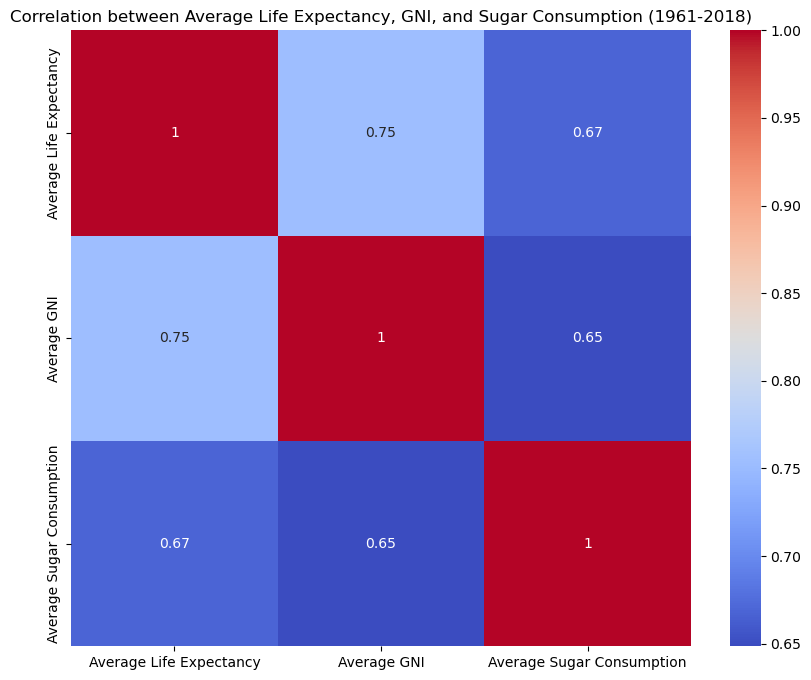

In [52]:
# plot heatmap for correlation between average life expectancy, GNI, and sugar consumption between 1961 and 2018
life_columns = [f"{year}_life" for year in range(1961, 2019)]
gni_columns = [f"{year}_gni" for year in range(1961, 2019)]
sugar_columns = [f"{year}_sugar" for year in range(1961, 2019)]
average_life_expectancy = merged_df[life_columns].mean(axis=1)
average_gni = merged_df[gni_columns].mean(axis=1)
average_sugar_consumption = merged_df[sugar_columns].mean(axis=1)
average_data = pd.DataFrame({'Average Life Expectancy': average_life_expectancy, 'Average GNI': average_gni, 'Average Sugar Consumption': average_sugar_consumption})
correlation_matrix = average_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Average Life Expectancy, GNI, and Sugar Consumption (1961-2018)')
plt.show()

*Interpretation: There is a moderate positive linear relationship between life expectancy, GNI, and sugar consumption.*

In [53]:
# melt each df
melted_sugar = sugar_df_cleaned.melt(id_vars=['country'], var_name='year', value_name='sugar_consumption')
melted_gni = gni_per_capita_df_cleaned.melt(id_vars=['country'], var_name='year', value_name='gni_per_capita')
melted_life_expectancy = life_expectancy_df_cleaned.melt(id_vars=['country'], var_name='year', value_name='life_expectancy')

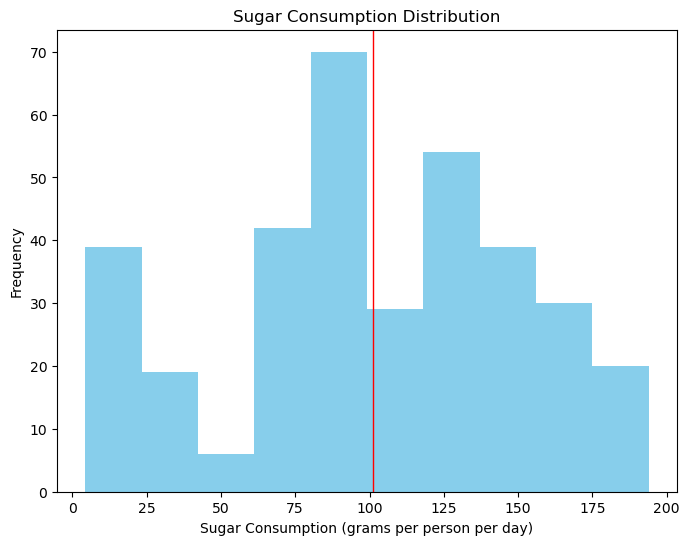

In [54]:
# sugar consumption histogram
plt.figure(figsize=(8, 6))
plt.hist(melted_sugar['sugar_consumption'], color='skyblue')
plt.axvline(melted_sugar['sugar_consumption'].mean(), color='red', linewidth=1)
plt.title('Sugar Consumption Distribution')
plt.xlabel('Sugar Consumption (grams per person per day)')
plt.ylabel('Frequency')
plt.show()

*Interpretation: Mean sugar consumption is around 100 grams per person per day. Data shows a somewhat normal distribution*

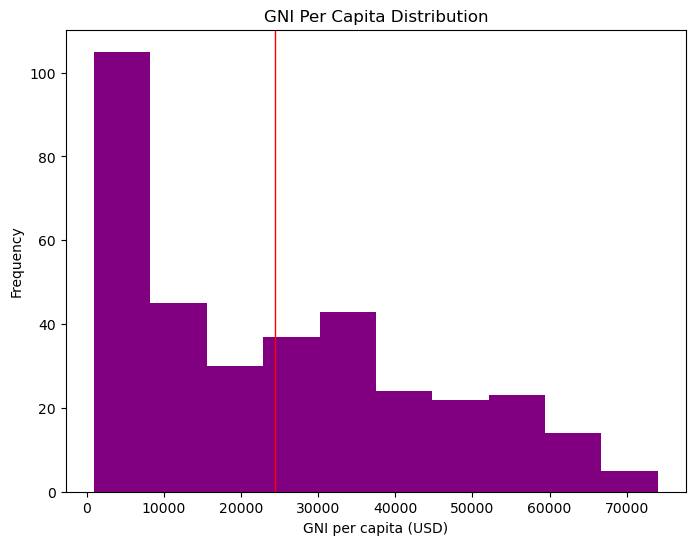

In [55]:
# GNI per capita histogram
plt.figure(figsize=(8, 6))
plt.hist(melted_gni['gni_per_capita'], color='purple')
plt.axvline(melted_gni['gni_per_capita'].mean(), color='red', linewidth=1)
plt.title('GNI Per Capita Distribution')
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Frequency')
plt.show()

*Interpretation: Mean GNI Per Capita is around $24,000 in USD. Data shows a right-skewed distribution.*

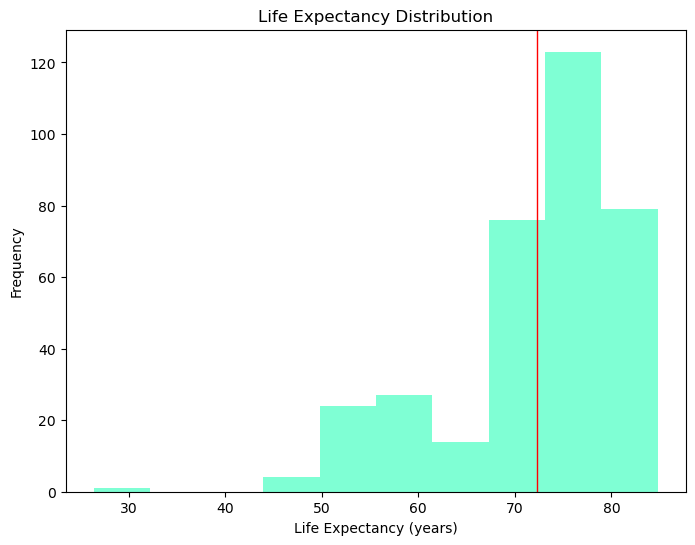

In [56]:
# life expectancy histogram
plt.figure(figsize=(8, 6))
plt.hist(melted_life_expectancy['life_expectancy'], color='aquamarine')
plt.axvline(melted_life_expectancy['life_expectancy'].mean(), color='red', linewidth=1)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

*Interpretation: Mean life expectancy is around 72 years. Data shows a left-skewed distribution.*

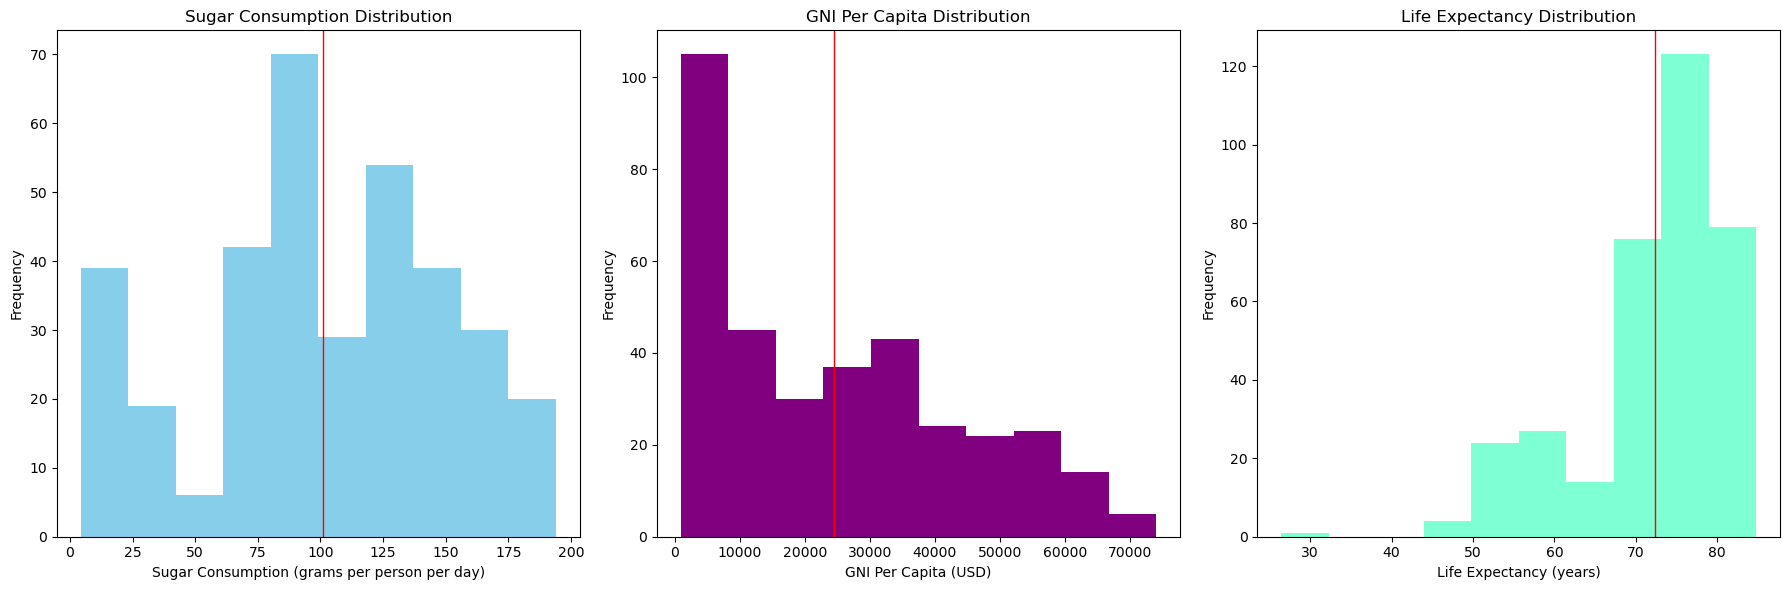

In [57]:
# subplots for histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# sugar consumption histogram
axes[0].hist(melted_sugar['sugar_consumption'], color='skyblue')
axes[0].axvline(melted_sugar['sugar_consumption'].mean(), color='red', linewidth=1)
axes[0].set_title('Sugar Consumption Distribution')
axes[0].set_xlabel('Sugar Consumption (grams per person per day)')
axes[0].set_ylabel('Frequency')

# GNI per capita histogram
axes[1].hist(melted_gni['gni_per_capita'], color='purple')
axes[1].axvline(melted_gni['gni_per_capita'].mean(), color='red', linewidth=1)
axes[1].set_title('GNI Per Capita Distribution')
axes[1].set_xlabel('GNI Per Capita (USD)')
axes[1].set_ylabel('Frequency')

# life expectancy histogram
axes[2].hist(melted_life_expectancy['life_expectancy'], color='aquamarine')
axes[2].axvline(melted_life_expectancy['life_expectancy'].mean(), color='red', linewidth=1)
axes[2].set_title('Life Expectancy Distribution')
axes[2].set_xlabel('Life Expectancy (years)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

*Interpretation: Subplots of the same previous three plots. See above for interpretations of individual plots.*

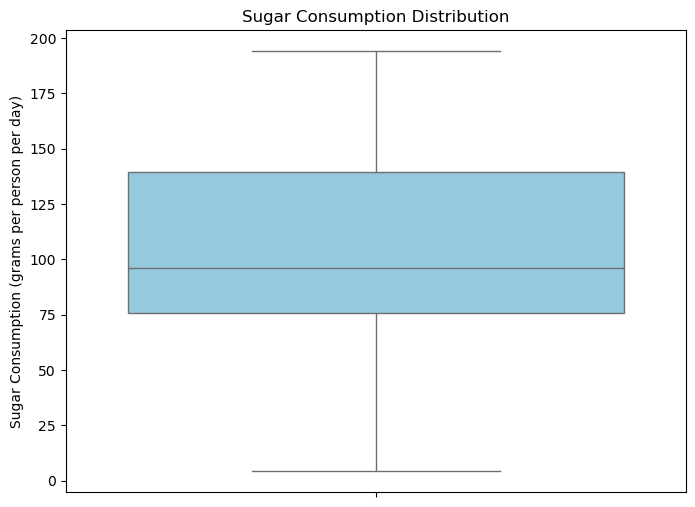

In [58]:
# sugar consumption boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=melted_sugar, y='sugar_consumption', color='skyblue')
plt.title('Sugar Consumption Distribution')
plt.ylabel('Sugar Consumption (grams per person per day)')
plt.show()

*Interpretation: Median sugar consumption is around 95 grams per person per day. Boxplot shows no outliers.*

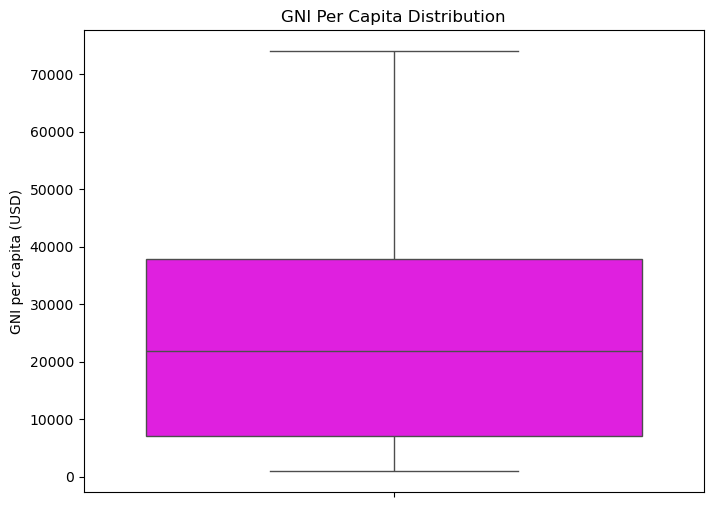

In [59]:
# GNI per capita boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=melted_gni, y='gni_per_capita', color='magenta')
plt.title('GNI Per Capita Distribution')
plt.ylabel('GNI per capita (USD)')
plt.show()

*Interpretation: Median GNI Per Capita is around $22,000 in USD. Boxplot shows no outliers.*

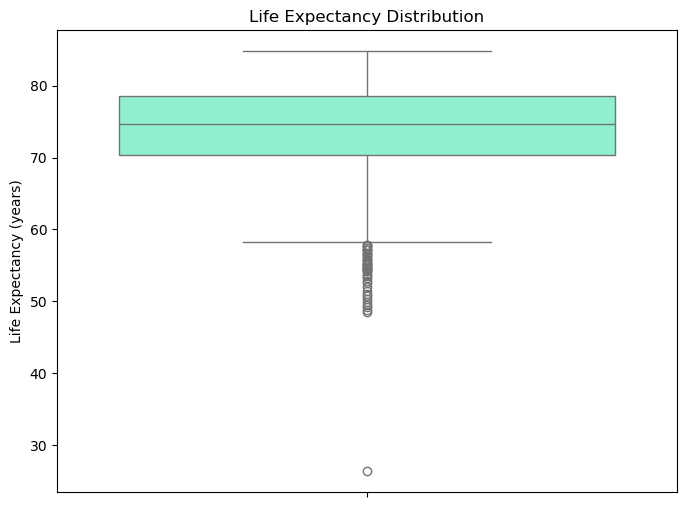

In [60]:
# life expectancy boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=melted_life_expectancy, y='life_expectancy', color='aquamarine')
plt.title('Life Expectancy Distribution')
plt.ylabel('Life Expectancy (years)')
plt.show()

*Interpretation: Median life expectancy is around 75 years. Boxplot shows many outliers.*

In [61]:
# specify years for scatter plots
years = range(1961, 2019)

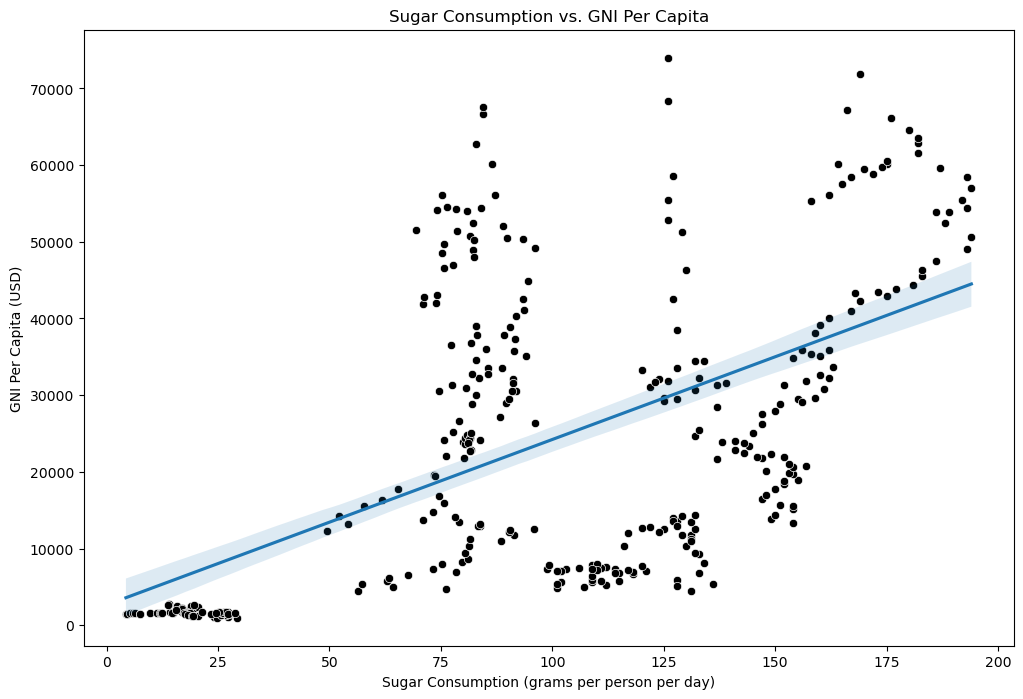

In [62]:
# create scatter plot with regression line for concatenated sugar and GNI per capita data
sugar_gni_combined = pd.DataFrame()
for year in years:
    df_year = merged_df[[f'{year}_sugar', f'{year}_gni']]
    df_year.columns = ['sugar', 'gni']
    sugar_gni_combined = pd.concat([sugar_gni_combined, df_year])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sugar_gni_combined, x='sugar', y='gni', color="black")
sns.regplot(data=sugar_gni_combined, x='sugar', y='gni', scatter=False)
plt.title('Sugar Consumption vs. GNI Per Capita')
plt.xlabel('Sugar Consumption (grams per person per day)')
plt.ylabel('GNI Per Capita (USD)')
plt.show()

*Interpretation: Linear regression line showing a moderate positive correlation between sugar consumption and GNI Per Capita.*

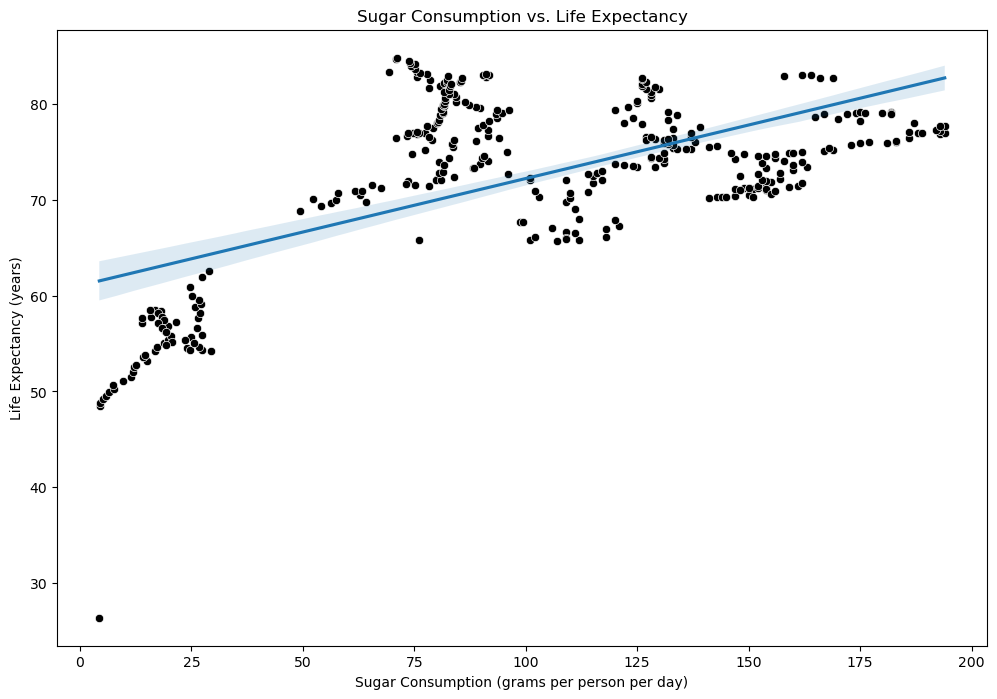

In [63]:
# create scatter plot with regression line for concatenated sugar and life expectancy data
sugar_life_combined = pd.DataFrame()
for year in years:
    df_year = merged_df[[f'{year}_sugar', f'{year}_life']]
    df_year.columns = ['sugar', 'life']
    sugar_life_combined = pd.concat([sugar_life_combined, df_year])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sugar_life_combined, x='sugar', y='life', color="black")
sns.regplot(data=sugar_life_combined, x='sugar', y='life', scatter=False)
plt.title('Sugar Consumption vs. Life Expectancy')
plt.xlabel('Sugar Consumption (grams per person per day)')
plt.ylabel('Life Expectancy (years)')
plt.show()

*Interpretation: Linear regression line showing a slight positive correlation between sugar consumption and life expectancy.*

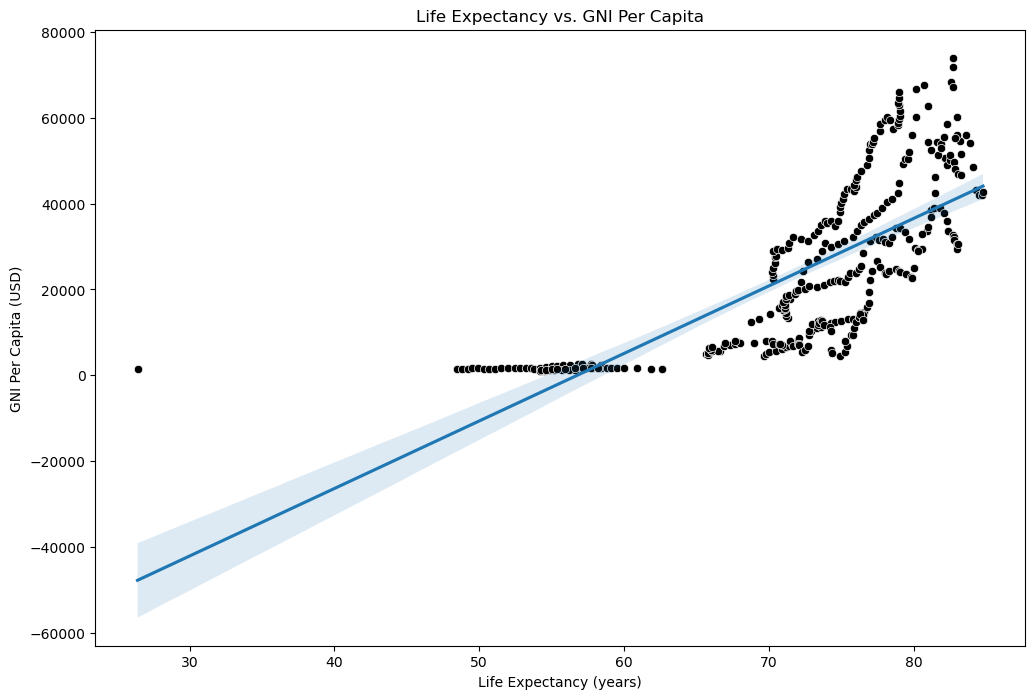

In [64]:
# create scatter plot with regression line for concatenated life expectancy and GNI per capita data
life_gni_combined = pd.DataFrame()
for year in years:
    df_year = merged_df[[f'{year}_life', f'{year}_gni']]
    df_year.columns = ['life', 'gni']
    life_gni_combined = pd.concat([life_gni_combined, df_year])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=life_gni_combined, x='life', y='gni', color="black")
sns.regplot(data=life_gni_combined, x='life', y='gni', scatter=False)
plt.title('Life Expectancy vs. GNI Per Capita')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('GNI Per Capita (USD)')
plt.show()

*Interpretation: Linear regression line showing a strong positive correlation between life expectancy and GNI Per Capita.*

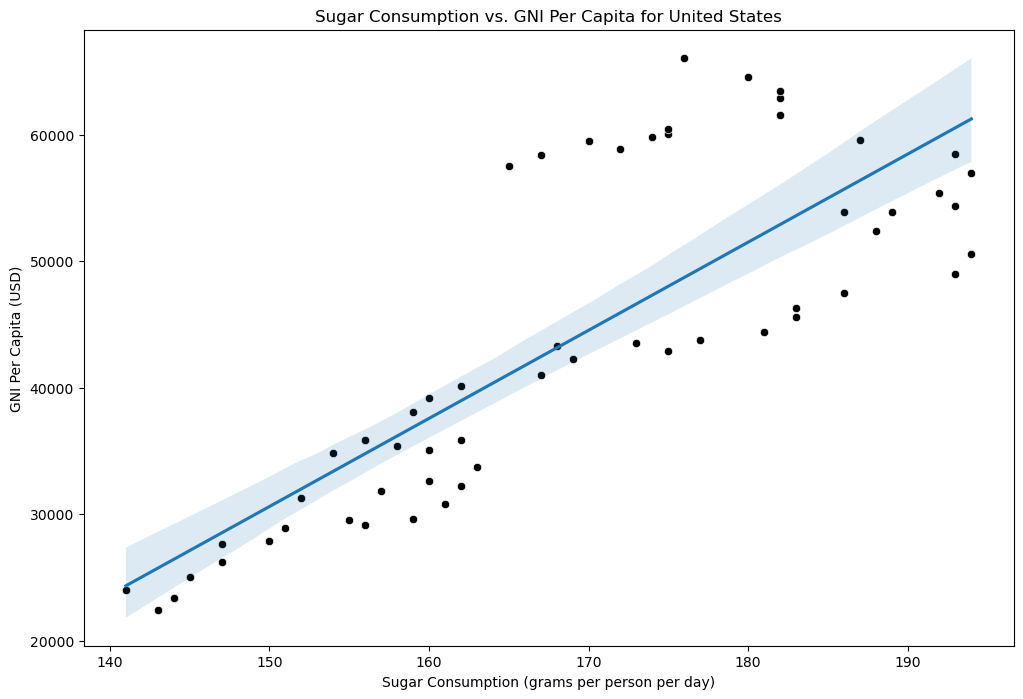

In [65]:
# create scatter plot with regression line for concatenated sugar consumption and GNI per capita data for a specific country
country = "United States"
sugar_gni_combined = pd.DataFrame()
for year in years:
    df_year = merged_df[merged_df['country'] == country][[f'{year}_sugar', f'{year}_gni']]
    df_year.columns = ['sugar', 'gni']
    sugar_gni_combined = pd.concat([sugar_gni_combined, df_year])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sugar_gni_combined, x='sugar', y='gni', color="black")
sns.regplot(data=sugar_gni_combined, x='sugar', y='gni', scatter=False)
plt.title(f'Sugar Consumption vs. GNI Per Capita for {country}')
plt.xlabel('Sugar Consumption (grams per person per day)')
plt.ylabel('GNI Per Capita (USD)')
plt.show()

*Interpretation: Linear regression line showing a strong positive correlation between sugar consumption and GNI Per Capita for the United States. This scatter plot can be adjusted to display any one of the six countries observed in this study.*

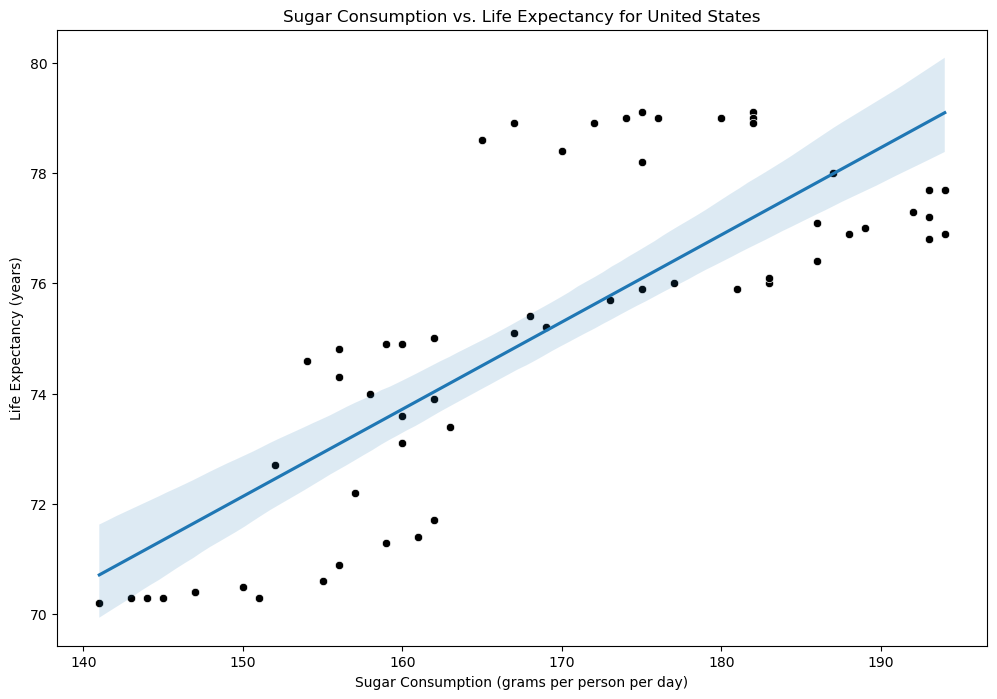

In [66]:
# create scatter plot with regression line for concatenated sugar consumption and life expectancy data for a specific country
country = "United States"
sugar_life_combined = pd.DataFrame()
for year in years:
    df_year = merged_df[merged_df['country'] == country][[f'{year}_sugar', f'{year}_life']]
    df_year.columns = ['sugar', 'life_expectancy']
    sugar_life_combined = pd.concat([sugar_life_combined, df_year])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sugar_life_combined, x='sugar', y='life_expectancy', color="black")
sns.regplot(data=sugar_life_combined, x='sugar', y='life_expectancy', scatter=False)
plt.title(f'Sugar Consumption vs. Life Expectancy for {country}')
plt.xlabel('Sugar Consumption (grams per person per day)')
plt.ylabel('Life Expectancy (years)')
plt.show()

*Interpretation: Linear regression line showing a strong positive correlation between sugar consumption and life expectancy for the United States. This scatter plot can be adjusted to display any one of the six countries observed in this study.*

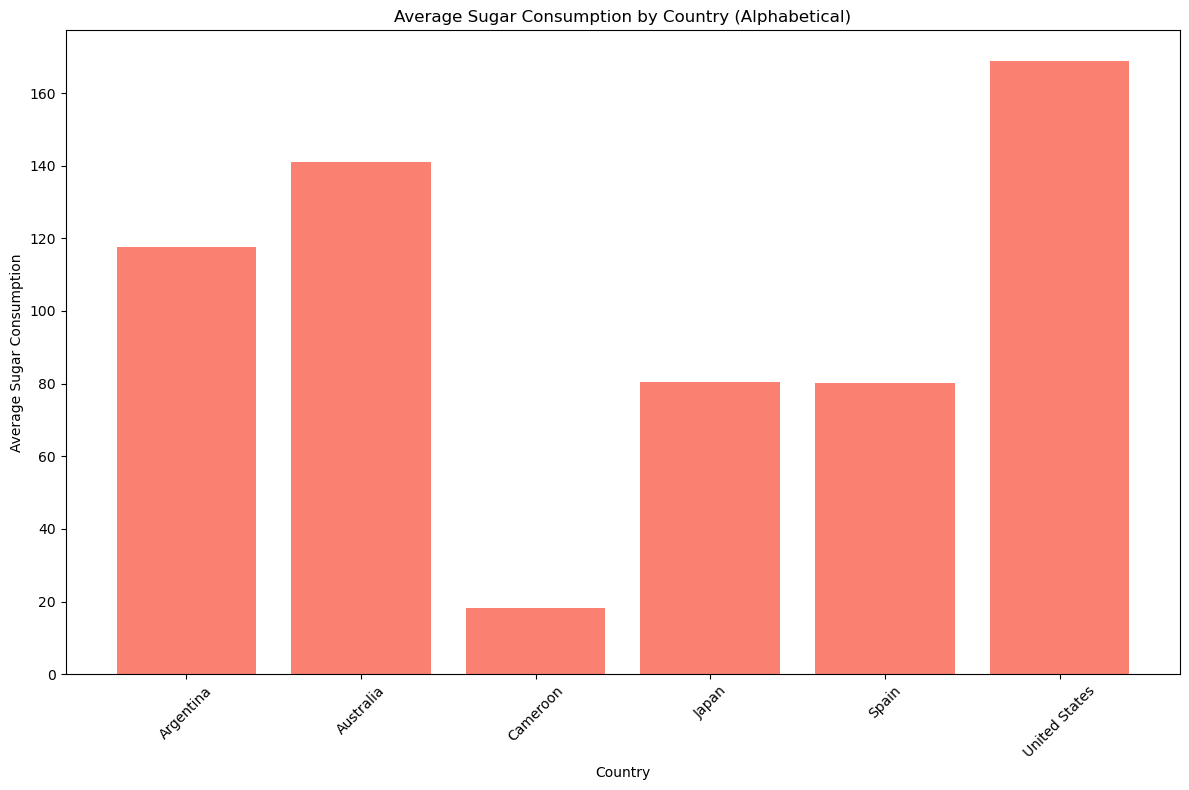

In [67]:
# sort df alphabetically by country name and plot average sugar consumption
sugar_stats_df_sorted = sugar_stats_df.sort_values(by='country')
plt.figure(figsize=(12, 8))
plt.bar(sugar_stats_df_sorted['country'], sugar_stats_df_sorted['average_sugar_consumption'], color='salmon')
plt.xlabel('Country')
plt.ylabel('Average Sugar Consumption')
plt.title('Average Sugar Consumption by Country (Alphabetical)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Interpretation: United States has the highest average sugar consumption, while Cameroon has the lowest average sugar consumption.*

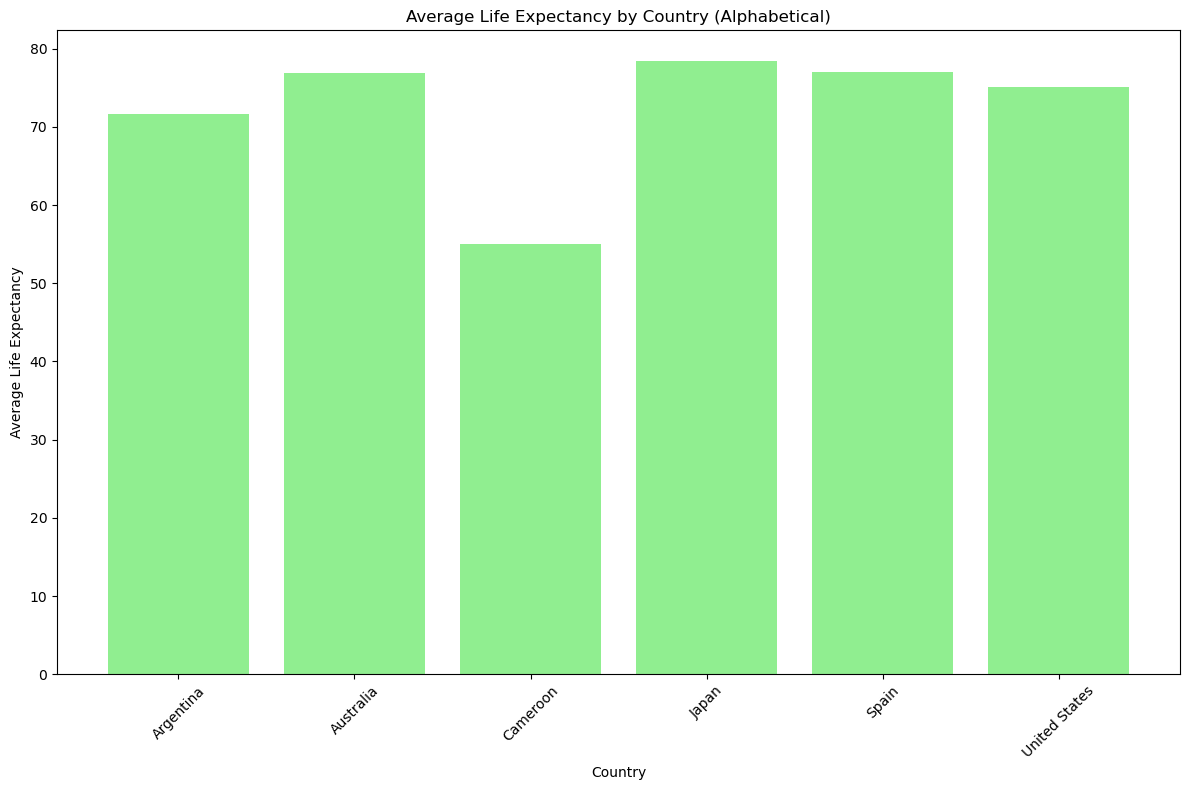

In [68]:
# sort df alphabetically by country name and plot average life expectancy
life_expectancy_stats_df_sorted = life_expectancy_stats_df.sort_values(by='country')
plt.figure(figsize=(12, 8))
plt.bar(life_expectancy_stats_df_sorted['country'], life_expectancy_stats_df_sorted['average_life_expectancy'], color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country (Alphabetical)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Interpretation: Japan has the highest average life expectancy, while Cameroon has the lowest average life expectancy (although, most countries are roughly the same).*

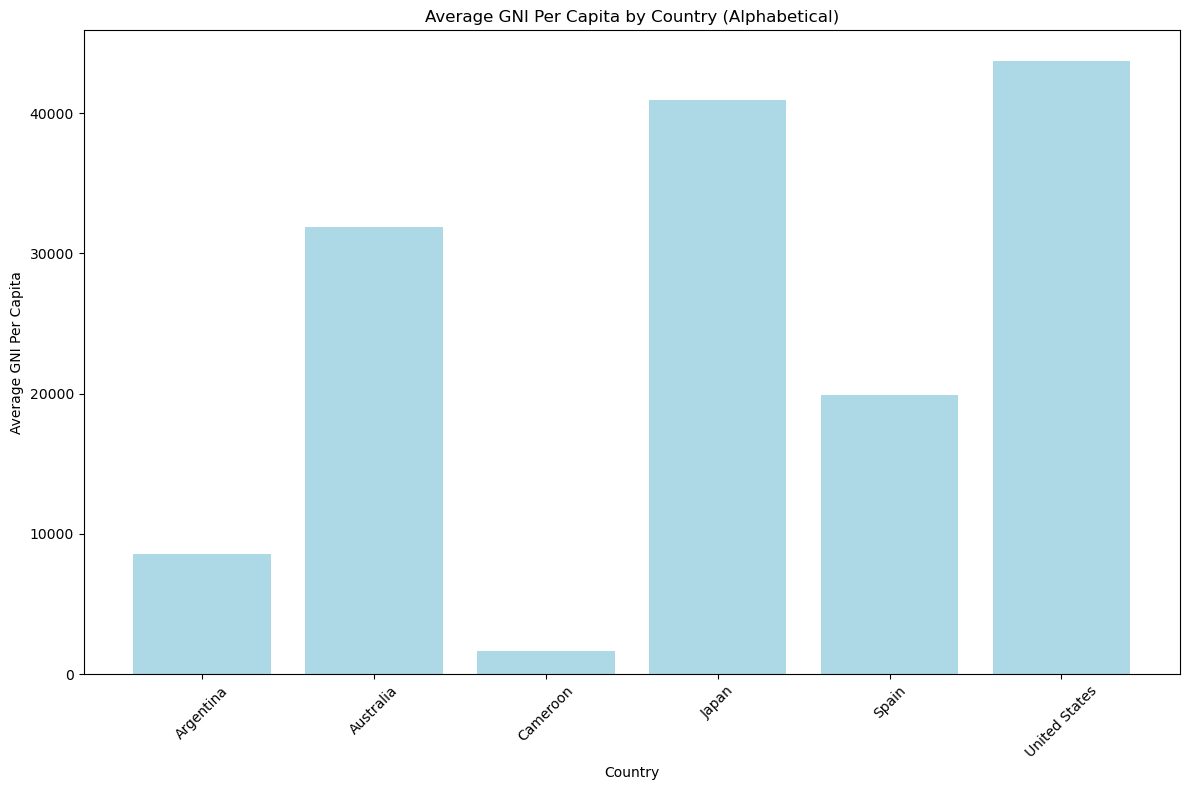

In [69]:
# sort df alphabetically by country name and plot average GNI per capita
gni_stats_df_sorted = gni_stats_df.sort_values(by='country')
plt.figure(figsize=(12, 8))
plt.bar(gni_stats_df_sorted['country'], gni_stats_df_sorted['average_gni'], color='lightblue')
plt.xlabel('Country')
plt.ylabel('Average GNI Per Capita')
plt.title('Average GNI Per Capita by Country (Alphabetical)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Interpretation: United States has the highest average GNI Per Capita, while Cameroon has the lowest average GNI Per Capita.*

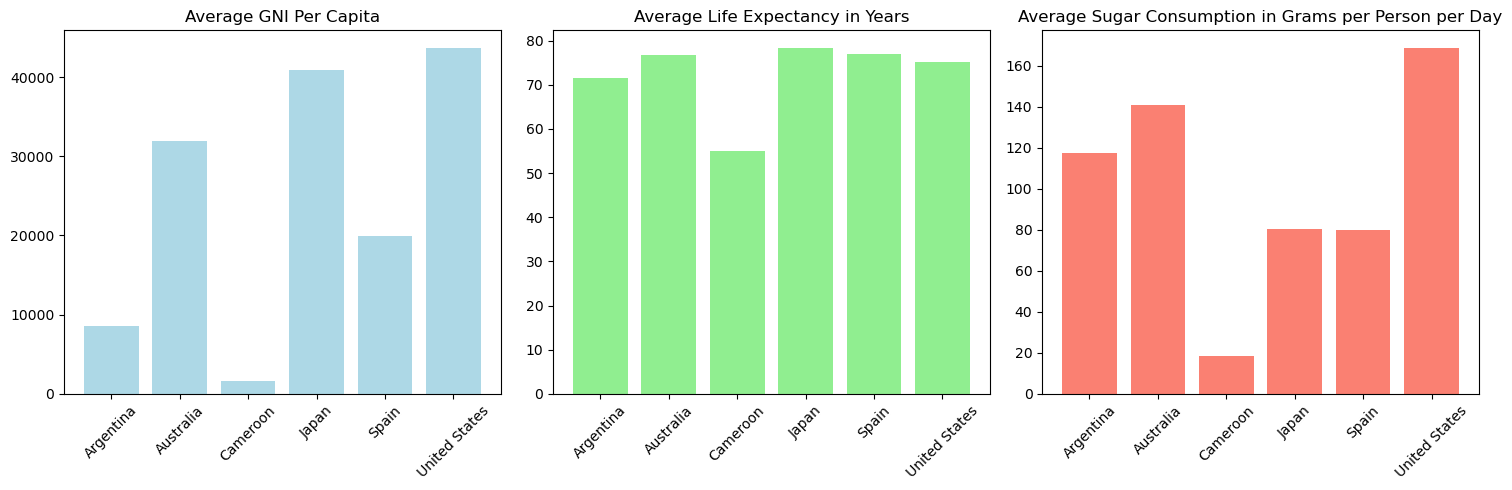

In [70]:
#subplots for bar charts
plt.figure(figsize=(15, 5))

# subplot for GNI
plt.subplot(1, 3, 1)
plt.bar(gni_stats_df_sorted['country'], gni_stats_df_sorted['average_gni'], color='lightblue')
plt.title('Average GNI Per Capita')
plt.xticks(rotation=45)

# subplot for Life Expectancy
plt.subplot(1, 3, 2)
plt.bar(life_expectancy_stats_df_sorted['country'], life_expectancy_stats_df_sorted['average_life_expectancy'], color='lightgreen')
plt.title('Average Life Expectancy in Years')
plt.xticks(rotation=45)

# subplot for Sugar Consumption
plt.subplot(1, 3, 3)
plt.bar(sugar_stats_df_sorted['country'], sugar_stats_df_sorted['average_sugar_consumption'], color='salmon')
plt.title('Average Sugar Consumption in Grams per Person per Day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

*Interpretation: Subplots of the same previous three plots. See above for interpretations of individual plots.*

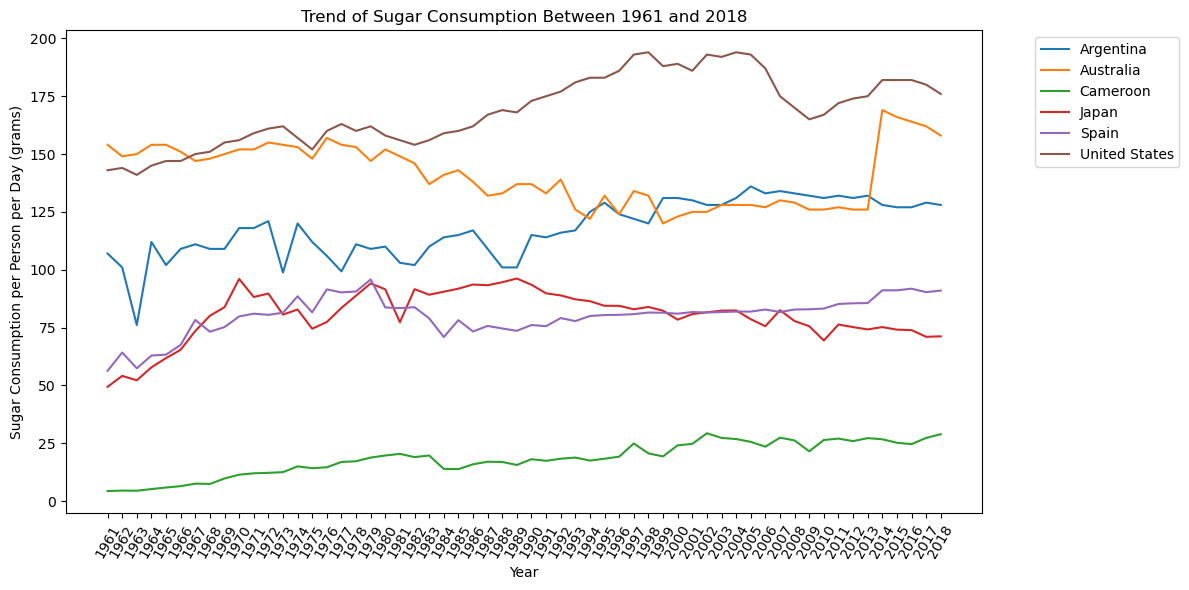

In [71]:
# melt sugar df and create line plot to show trend of sugar consumption
melted_df = pd.melt(sugar_df_cleaned, id_vars=['country'], var_name='year', value_name='sugar_consumption')
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='year', y='sugar_consumption', hue='country')
plt.title('Trend of Sugar Consumption Between 1961 and 2018')
plt.xlabel('Year')
plt.ylabel('Sugar Consumption per Person per Day (grams)')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*Interpretation: Trend of sugar consumption between 1961 and 2018 (inclusive) for the six countries observed in this study. Mostly stagnant throughout, with many peaks and troughs over time. United States and Australia have more recent spikes in sugar consumption compared to other countries.*

## Conclusions and Recommendations

- Moderate positive correlation between sugar consumption and GNI
- Wealthier countries tend to have higher sugar consumption
- Slight positive correlation between sugar consumption and life expectancy
- Although the data shows that there is a slight positive correlation between sugar consumption and life expectancy, other factors need to be considered that can affect life expectancy as well
- Strong positive correlation between life expectancy and GNI
- Countries with higher economic status tend to have longer life expectancy
- Moderation is still key since excessive sugar intake can lead to various health issues
- Individuals should be encouraged to consume other foods to maintain a balanced and healthy lifestyle
- Remember: correlation does not imply causation!

**Limitations and Future Studies**
- This study was limited to the data from six countries
- This study was limited to the time frame between 1961 and 2018 (inclusive)
- Future studies should include expanding both the countries and the time frame to include a larger sample size
- Future studies should also explore other factors that can affect life expectancy

## Sources

- Gapminder datasets (https://www.gapminder.org/data/):
  - Life Expectancy by Country (life_expectancy.csv)
  - Gross National Income (GNI) per capita in current US dollars (gni_per_cap_atlas_method_con2021.csv)
  - Sugar in grams per person per day (sugar_per_person_g_per_day.csv)- Website (Bloomberg Global Health Index): https://worldpopulationreview.com/country-rankings/healthiest-countries